#Ada Boosting

#Test Train Split

In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
from google.colab import drive
drive.mount("/content/drive", force_remount=True)
df = pd.read_csv("/content/drive/My Drive/Rtfp/final_cleveland.csv")
X = df.drop("target", axis=1)
y = df["target"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Mounted at /content/drive



Base AdaBoost Model
Accuracy: 0.9

Classification Report:
               precision    recall  f1-score   support

           0       0.94      0.89      0.91        36
           1       0.85      0.92      0.88        24

    accuracy                           0.90        60
   macro avg       0.89      0.90      0.90        60
weighted avg       0.90      0.90      0.90        60


Confusion Matrix:
 [[32  4]
 [ 2 22]]


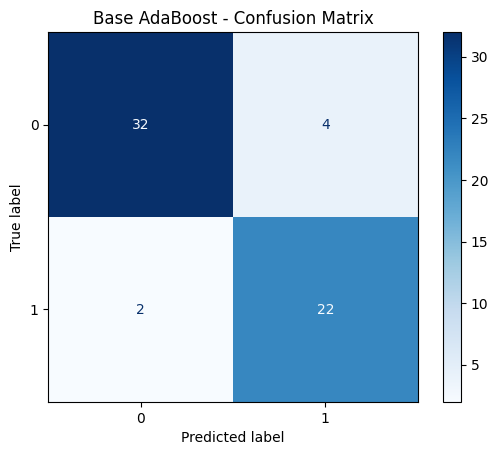

In [2]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import cross_val_score
import matplotlib.pyplot as plt

ada = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=1),
    n_estimators=50,
    learning_rate=0.1,
    random_state=42
)

ada.fit(X_train, y_train)

y_pred = ada.predict(X_test)

print("\nBase AdaBoost Model")
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("\nConfusion Matrix:\n", confusion_matrix(y_test, y_pred))
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap=plt.cm.Blues, values_format='d')
plt.title("Base AdaBoost - Confusion Matrix")
plt.grid(False)
plt.show()


In [4]:
import joblib
joblib.dump(ada, '/content/drive/My Drive/Rtfp/models/ada_boosting_model.pkl')


['/content/drive/My Drive/Rtfp/models/ada_boosting_model.pkl']